In [1]:
import os
import sys
sys.path.insert(0, '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset')
sys.path.insert(0, '/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/lib')
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm

from analysis.plot_generators.plot_utils import make_performance_line_plot, jaccard_set, pickle2dict

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#### Global configurations

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# S5.1

#### Figure 5.1.1

In [95]:
train_csv_path = '../plot_csv/section_5/figure_5_1_1_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_1_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train: pixel-wise', 'train: occurence'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val: pixel-wise', 'val: occurence'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

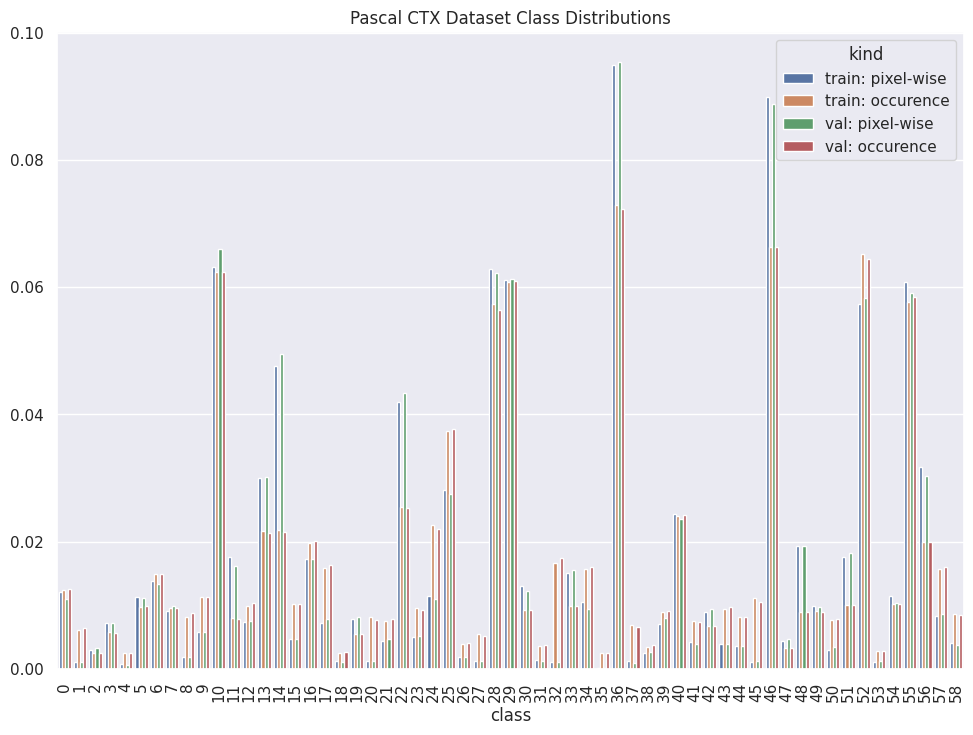

In [96]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Pascal CTX Dataset Class Distributions')
plt.set_ylabel('')

#### Figure 5.1.2

In [5]:
train_csv_path = '../plot_csv/section_5/figure_5_1_2_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_2_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train: pixel-wise', 'train: occurence'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val: pixel-wise', 'val: occurence'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

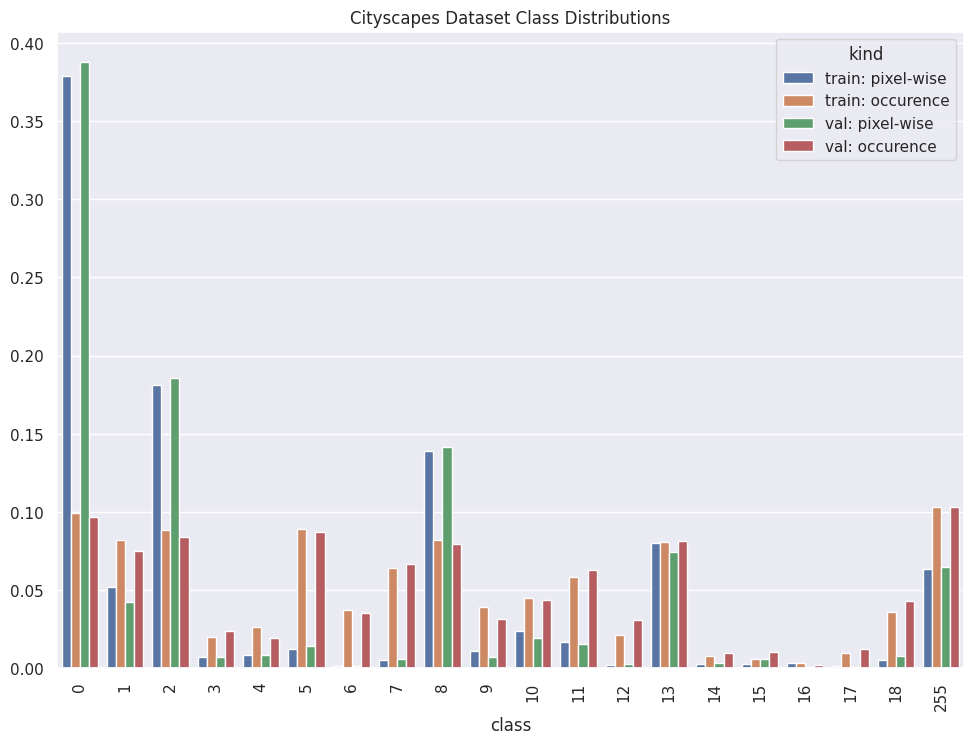

In [6]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Cityscapes Dataset Class Distributions')
plt.set_ylabel('')

#### Figure 5.1.4

In [7]:
train_csv_path = '../plot_csv/section_5/figure_5_1_4_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_4_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

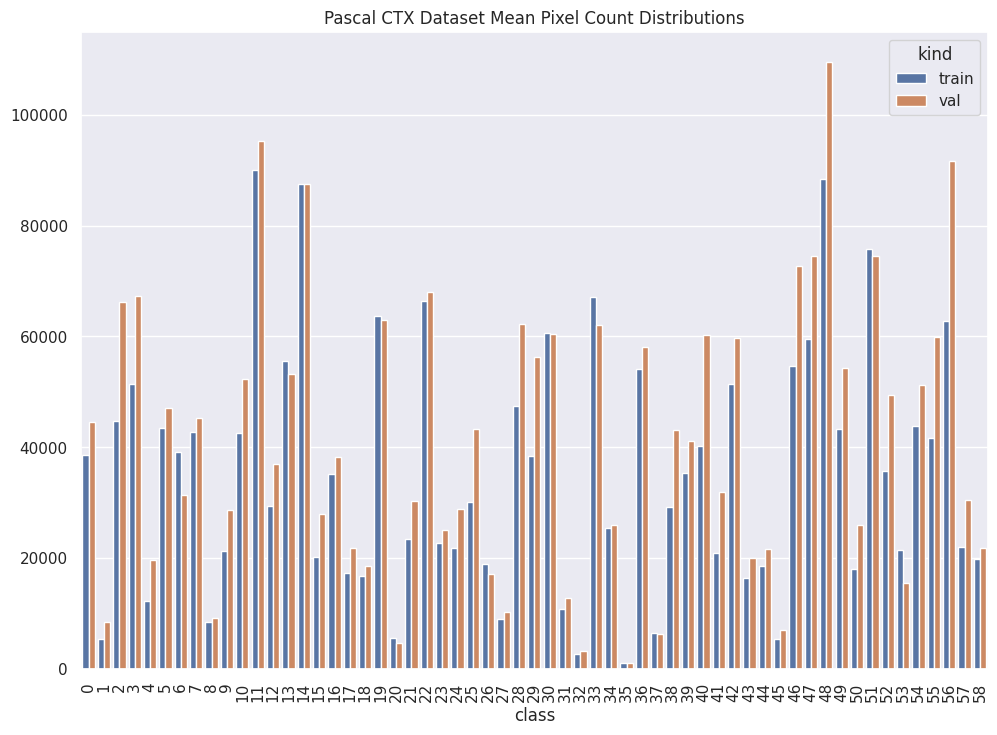

In [8]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Pascal CTX Dataset Mean Pixel Count Distributions')
plt.set_ylabel('')

#### Figure 5.1.5

In [9]:
train_csv_path = '../plot_csv/section_5/figure_5_1_5_train.csv'
val_csv_path = '../plot_csv/section_5/figure_5_1_5_val.csv'

train_df = pd.read_csv(train_csv_path)
train_df = train_df.set_axis(['class', 'train'], axis = 1)
val_df = pd.read_csv(val_csv_path)
val_df = val_df.set_axis(['class', 'val'], axis = 1)

figure_df = train_df.merge(val_df)

Text(0, 0.5, '')

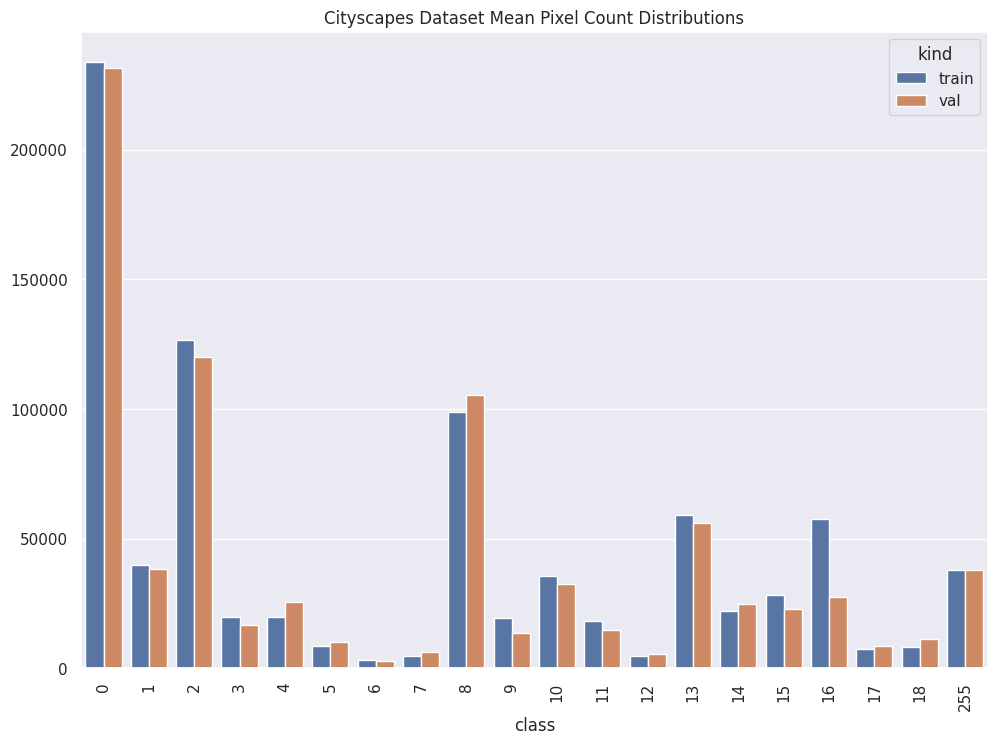

In [10]:
plot_df = figure_df.melt(id_vars=['class'], var_name='kind', value_name='proportion')
plt = sns.barplot(data=plot_df, x='class', y='proportion', hue='kind')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Cityscapes Dataset Mean Pixel Count Distributions')
plt.set_ylabel('')

#### Figure 5.1.7

In [11]:
csv_path = '../plot_csv/section_5/figure_5_1_7_train.csv'
figure_df = pd.read_csv(csv_path)
clean_df = figure_df.drop(labels=['-1', '0'], axis='columns')
clean_df = clean_df.drop(labels=0, axis='index')
clean_df = clean_df.set_axis(range(59), axis=0)
clean_df = clean_df.set_axis(range(59), axis=1)

Text(0.5, 1.0, 'Pascal CTX Class Co-occurence')

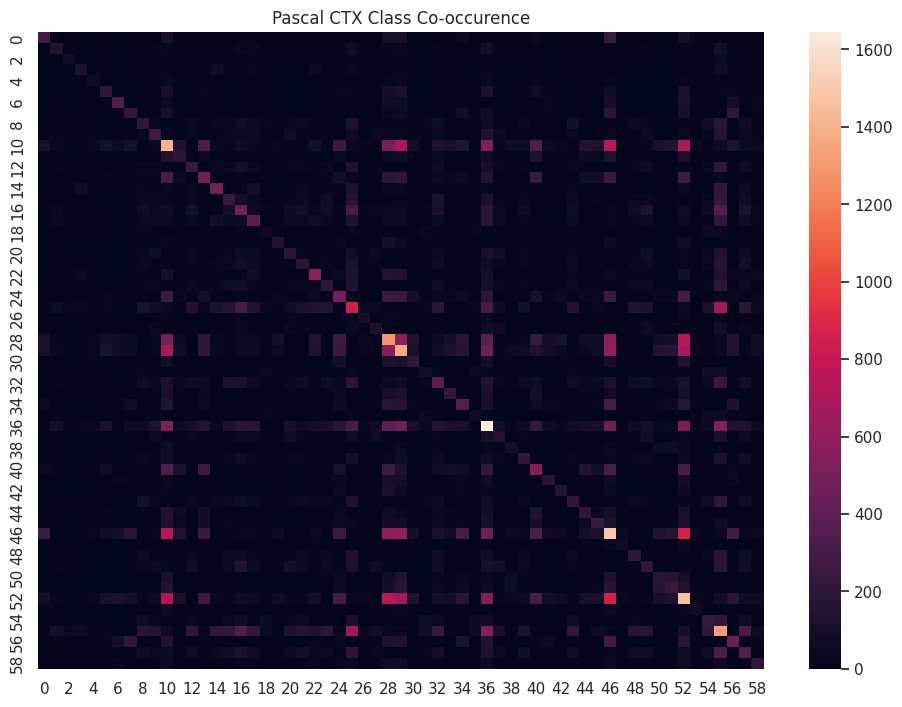

In [12]:
heat_map = sns.heatmap(clean_df)
heat_map.set_title('Pascal CTX Class Co-occurence')

#### Figure 5.1.8

In [13]:
csv_path = '../plot_csv/section_5/figure_5_1_8_train.csv'
figure_df = pd.read_csv(csv_path)
clean_df = figure_df.drop(labels=['0'], axis='columns')
clean_df = clean_df.rename(columns={'0.1':'0'})
clean_df = clean_df.set_axis(clean_df.columns, axis=0)

Text(0.5, 1.0, 'Cityscapes Class Co-occurence')

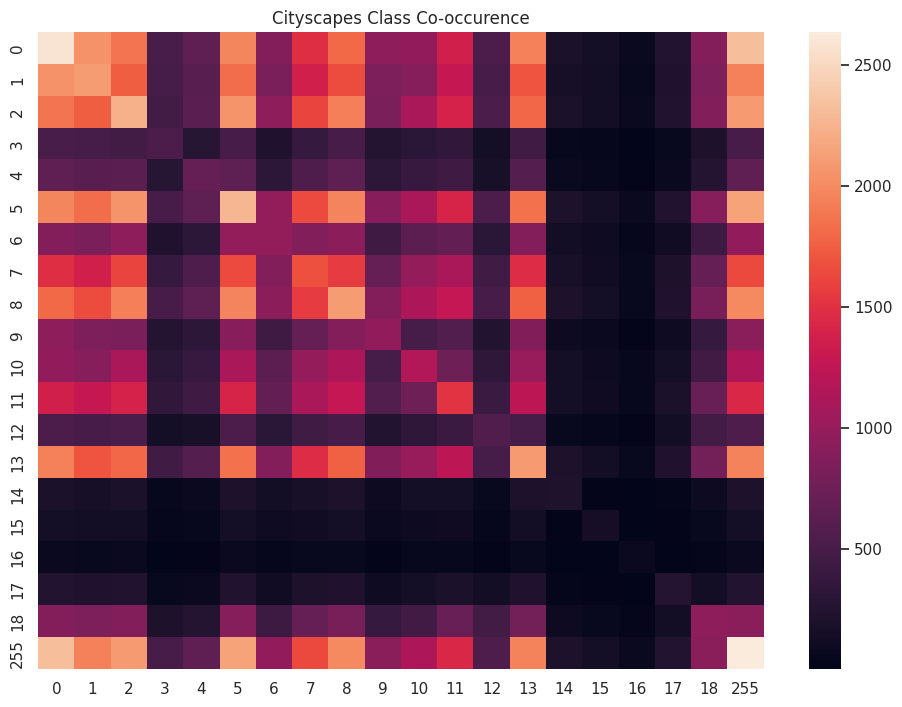

In [14]:
heat_map = sns.heatmap(clean_df)
heat_map.set_title('Cityscapes Class Co-occurence')

# S5.2

#### Figure 5.2.1

In [15]:
csv_path = '../plot_csv/section_5/figure_5_2_1.csv'
figure_df = pd.read_csv(csv_path)

Text(0.5, 1.0, 'Pascal CTX Random Baselines')

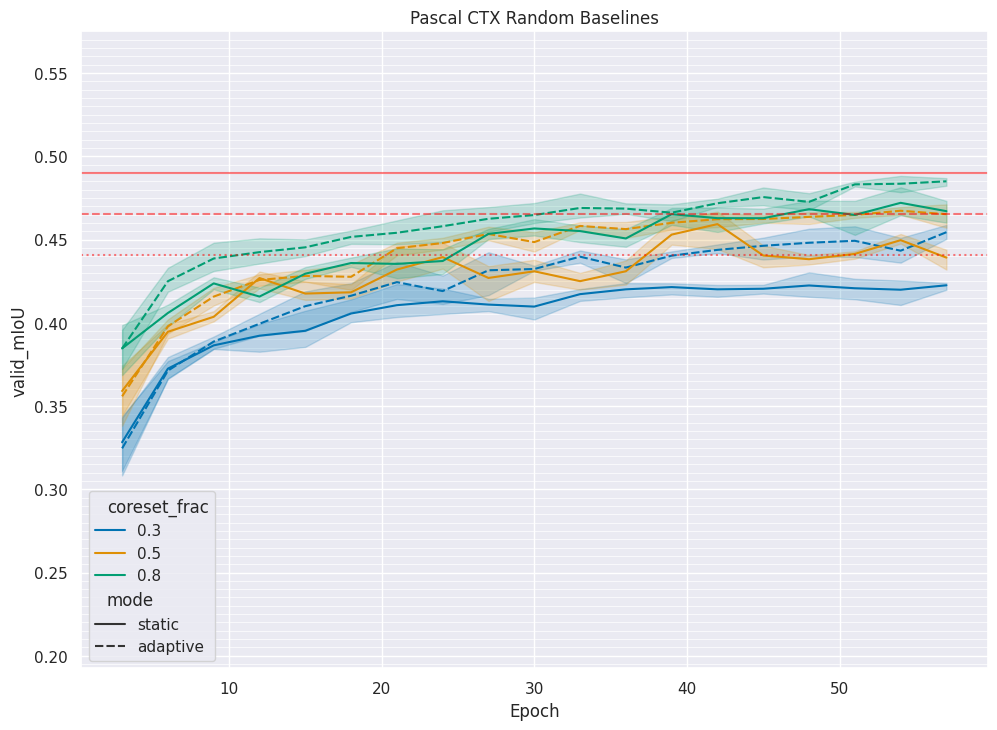

In [16]:
SCALARS = ["valid_mIoU", "valid_loss", "train_loss"]
full_model_performance_dict = dict(zip(SCALARS, [0.49, 0.8753, 0.1515]))
scalar = 'valid_mIoU'

hue = figure_df["mode"].astype(str) + ", " + figure_df["coreset_frac"].astype(str)

line_plt = sns.lineplot(data=figure_df, x="step_num", y="val", hue='coreset_frac', style='mode', palette='colorblind')  # .set_title("valid_mIoU")
line_plt.set_ylim(np.min(line_plt.get_yticks()) * 0.7, np.max(line_plt.get_yticks()) * 1.15)
line_plt.get_yaxis().set_minor_locator(ticker.AutoMinorLocator(n=10))
line_plt.grid(which="major", color="w", linewidth=1.0)
line_plt.grid(which="minor", color="w", linewidth=0.5)
line_plt.axhline(full_model_performance_dict[scalar], alpha=0.5, color="red")
line_plt.axhline(full_model_performance_dict[scalar] * (0.95 if scalar == "valid_mIoU" else 1.05), alpha=0.5, color="red", linestyle="--")
line_plt.axhline(full_model_performance_dict[scalar] * (0.90 if scalar == "valid_mIoU" else 1.10), alpha=0.5, color="red", linestyle=":")

line_plt.set_xlabel("Epoch")
line_plt.set_ylabel(scalar)
line_plt.set_title("Pascal CTX Random Baselines")

# S5.3

#### FIgure 5.3.1

In [17]:
csv_path = '../plot_csv/section_5/figure_5_3_1.csv'
figure_df = pd.read_csv(csv_path)

figure_df.drop(figure_df[figure_df['proportion_ft'] == 0].index, inplace=True)

Text(0, 0.5, 'Training Time Proportion')

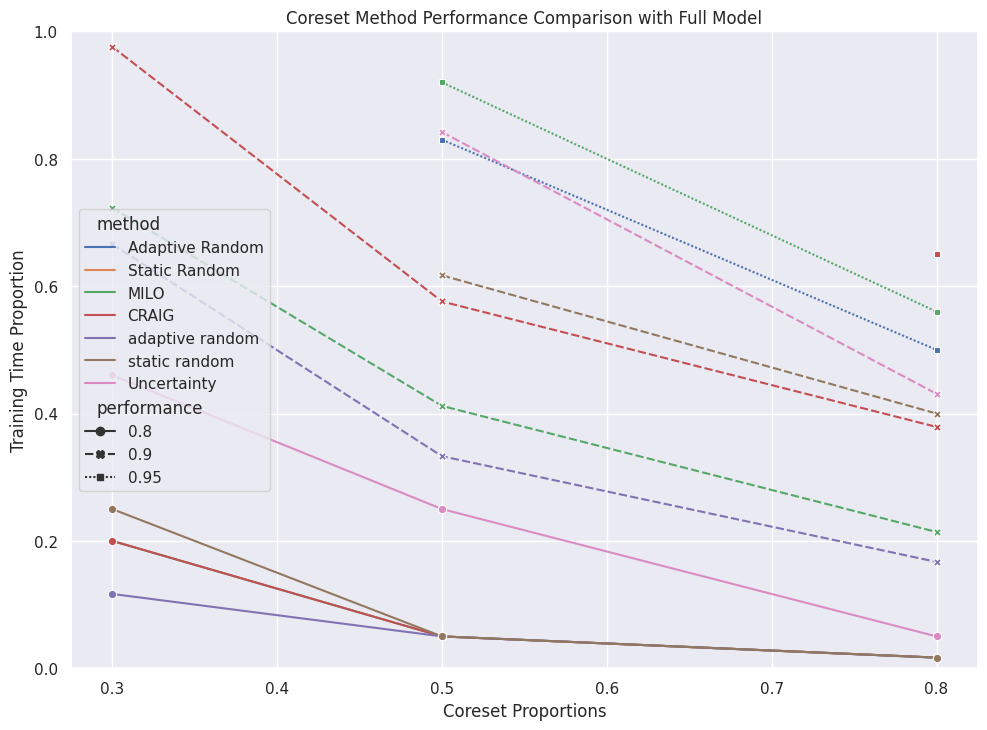

In [18]:
line_plot = sns.lineplot(data=figure_df, x='coreset', y='proportion_ft', hue='method', style='performance', markers=True)
line_plot.set_ylim(0, 1)
line_plot.set_title("Coreset Method Performance Comparison with Full Model")
line_plot.set_xlabel("Coreset Proportions")
line_plot.set_ylabel("Training Time Proportion")

# S5.4

#### Figure 5.4.4.1

In [19]:
csv_path = '../plot_csv/section_5/figure_5_4_4_1.csv'
figure_df = pd.read_csv(csv_path)

In [20]:
mean_val = figure_df[['val', 'epsilon', 'step_num']].groupby(['epsilon', 'step_num'], as_index=False).mean()

# Exponential Smoothing
smoothing_level = 0.3
smoothed_data = {}
for epsilon in mean_val['epsilon'].unique():
    data = mean_val[mean_val['epsilon']==epsilon]
    model = SimpleExpSmoothing(np.asarray(data['val']))
    fit = model.fit(smoothing_level=smoothing_level)
    smoothed_data[epsilon] = fit.fittedvalues
smoothed_data['step_num'] = data['step_num'].values
smoothed_df = pd.DataFrame(smoothed_data).melt(id_vars=['step_num'], var_name='epsilon')
smoothed_df.rename(columns = {'value': 'valid_mIoU'}, inplace=True)

/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


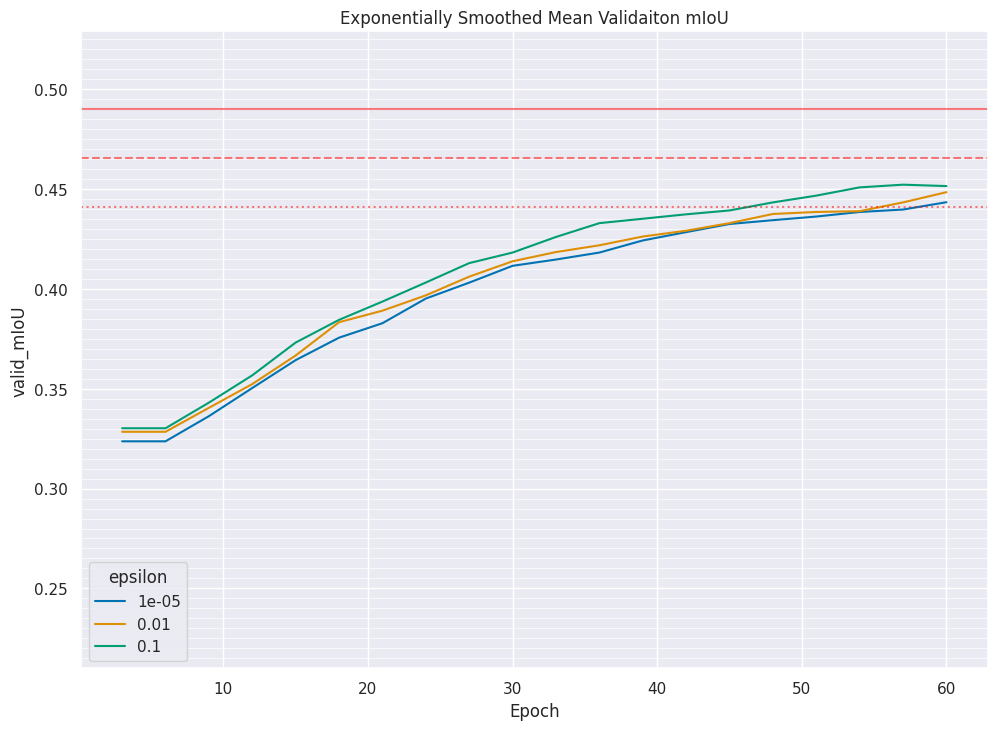

In [21]:
make_performance_line_plot(smoothed_df, 'step_num', 'valid_mIoU', 'epsilon',"Exponentially Smoothed Mean Validaiton mIoU")

#### Figure 5.4.4.2

In [22]:
csv_path = '../plot_csv/section_5/figure_5_4_4_2.csv'
figure_df = pd.read_csv(csv_path)

In [23]:
mean_val = figure_df[['val', 'epsilon', 'step_num']].groupby(['epsilon', 'step_num'], as_index=False).mean()

# Exponential Smoothing
smoothing_level = 0.3
smoothed_data = {}
for epsilon in mean_val['epsilon'].unique():
    data = mean_val[mean_val['epsilon']==epsilon]
    model = SimpleExpSmoothing(np.asarray(data['val']))
    fit = model.fit(smoothing_level=smoothing_level)
    smoothed_data[epsilon] = fit.fittedvalues
smoothed_data['step_num'] = data['step_num'].values
smoothed_df = pd.DataFrame(smoothed_data).melt(id_vars=['step_num'], var_name='epsilon')
smoothed_df.rename(columns = {'value': 'valid_loss'}, inplace=True)

/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/nickbarry/Documents/MsC-DS/Data_Science_Research_Project/Coresets/Repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


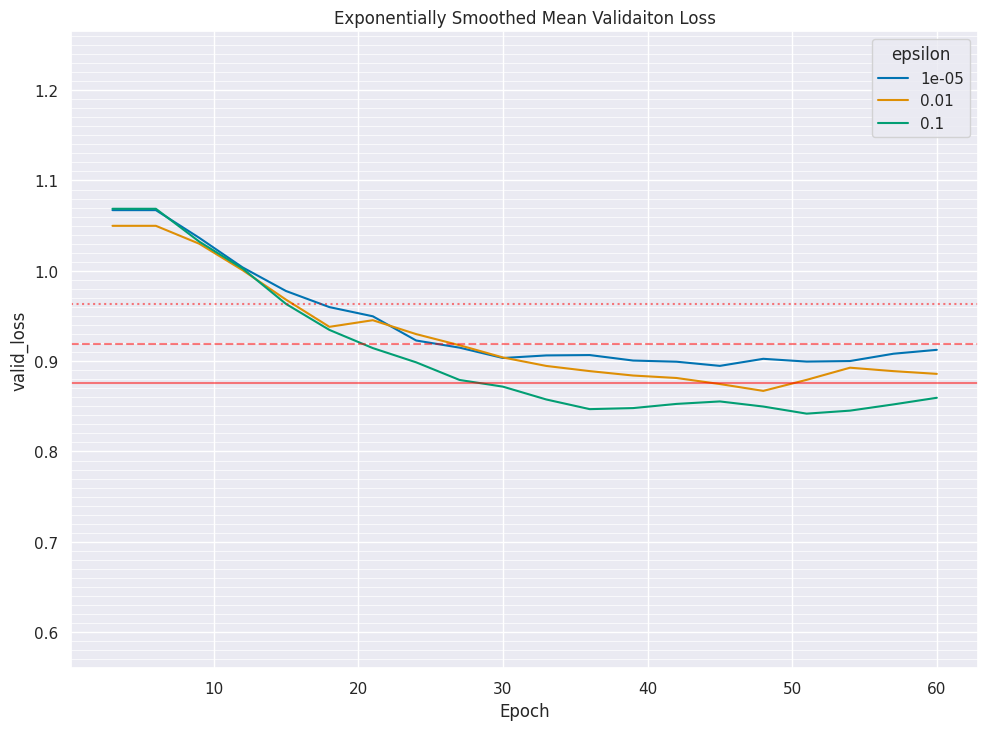

In [24]:
make_performance_line_plot(smoothed_df, 'step_num', 'valid_loss', 'epsilon',"Exponentially Smoothed Mean Validaiton Loss")

#### Figure 5.4.4.2

Stochastic subset file exists: True


100%|██████████| 300/300 [00:07<00:00, 38.32it/s] 


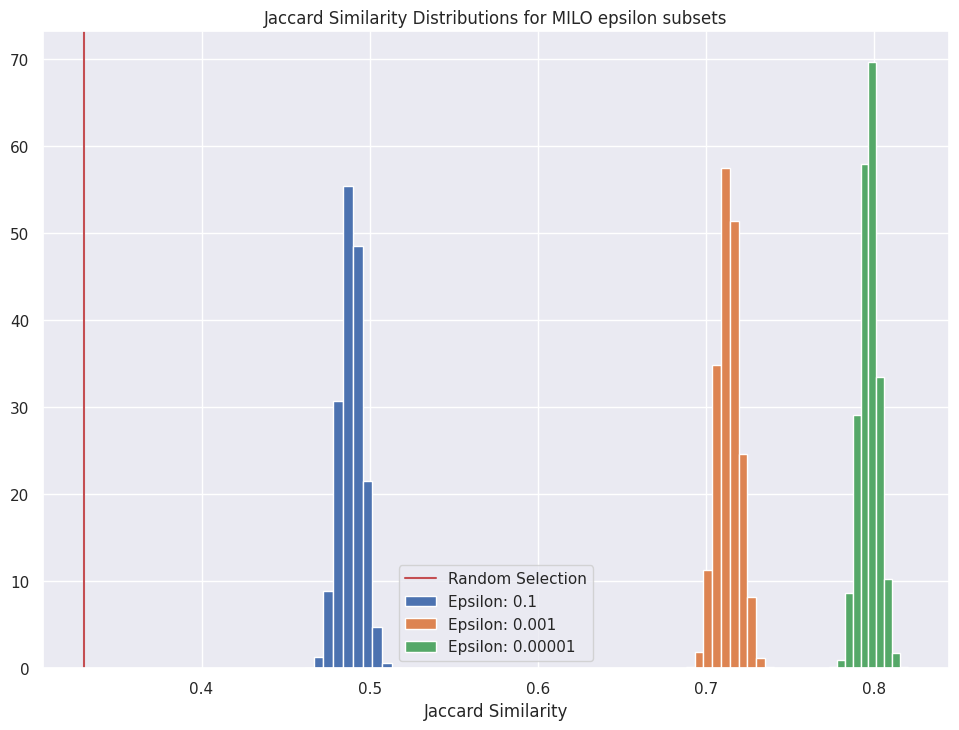

In [28]:
subset_paths = [
    '../../data/preprocessing/pascal_ctx_ViT_cossim_0.1_gc_0.1_0.5_stochastic_subsets.pkl',
    '../../data/preprocessing/pascal_ctx_ViT_cossim_0.001_gc_0.1_0.5_stochastic_subsets.pkl',
    '../../data/preprocessing/pascal_ctx_ViT_cossim_1e-05_gc_0.1_0.5_stochastic_subsets.pkl',
]
print(f'Stochastic subset file exists: {os.path.exists(subset_paths[0])}')

experiments = []
for subset_path in subset_paths:
    subsets = pickle2dict(subset_path, 'stochastic_subsets')
    stochastic_subsets = []
    for subset in subsets:
        stochastic_subsets.append([x[0] for x in subset])
    experiments.append(stochastic_subsets)

for stochastic_subsets in experiments:
    n = len(stochastic_subsets)
    jaccs = []
    for _,i in tqdm(enumerate(range(n)), total=n):
        for j in range(i+1,n):
            jaccs.append(jaccard_set(stochastic_subsets[i], stochastic_subsets[j]))
    plt.hist(jaccs, density=True)
plt.title('Jaccard Similarity Distributions for MILO epsilon subsets')
plt.xlabel('Jaccard Similarity')
plt.axvline(x = 0.33, color = 'r', label = 'Random Selection')
plt.legend(['Random Selection', 'Epsilon: 0.1', 'Epsilon: 0.001', 'Epsilon: 0.00001'])

#### Figure 5.4.4.3

In [36]:
csv_path = '../plot_csv/section_5/figure_5_4_4_3.csv'
figure_df = pd.read_csv(csv_path, index_col=0)

Text(0, 0.5, '')

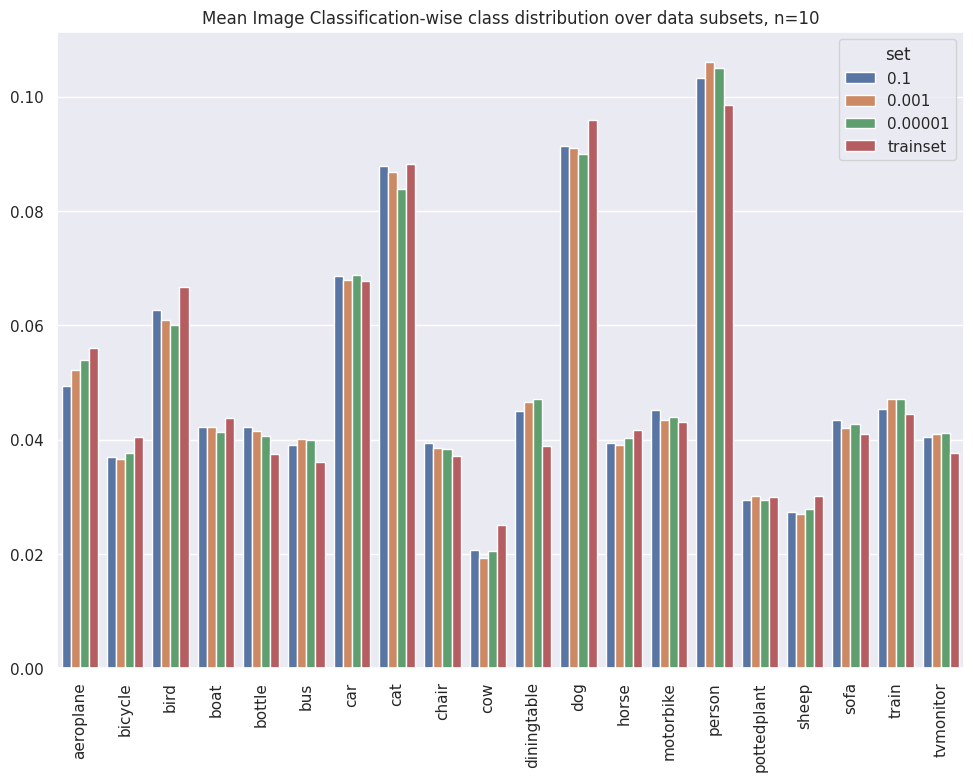

In [39]:
plot_df = figure_df.melt(var_name='set', value_name='count', ignore_index=False)
plt = sns.barplot(data=plot_df, x=plot_df.index, y='count', hue='set')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Mean Image Classification-wise class distribution over data subsets, n=10')
plt.set_ylabel('')

#### Figure 5.4.4.4 / Figure 5.4.4.5

In [125]:
csv_path = '../plot_csv/section_5/figure_5_4_4_4.csv'
figure_df = pd.read_csv(csv_path)

In [126]:
pixel_df = figure_df[['0.1', '0.001', '0.00001', 'trainset: pixel', 'class']]
pixel_df = pixel_df.rename(columns={'trainset: pixel':'train'})
pixel_df['mode'] = 'pixel'
occurence_df = figure_df[['0.1.1', '0.001.1', '0.00001.1', 'trainset: occurence', 'class']]
occurence_df = occurence_df.rename({'0.1.1':'0.1', '0.001.1':'0.001', '0.00001.1':'0.00001', 'trainset: occurence':'train'}, axis=1)
occurence_df['mode'] = 'occurence'

In [127]:
occurence_df = occurence_df.melt(id_vars=['mode', 'class'], value_name='proportion', var_name='epsilon')
pixel_df = pixel_df.melt(id_vars=['mode', 'class'], value_name='proportion', var_name='epsilon')


Text(0, 0.5, '')

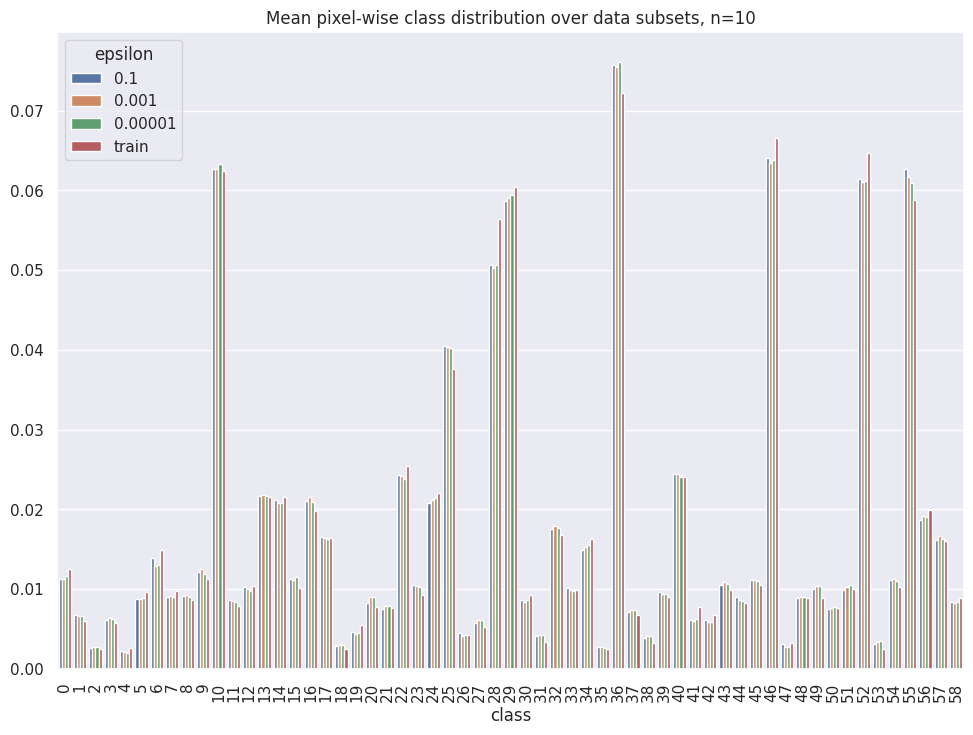

In [136]:
plt = sns.barplot(data=occurence_df, x='class', y='proportion', hue='epsilon')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Mean occurence-wise class distribution over data subsets, n=10')
plt.set_ylabel('')

Text(0, 0.5, '')

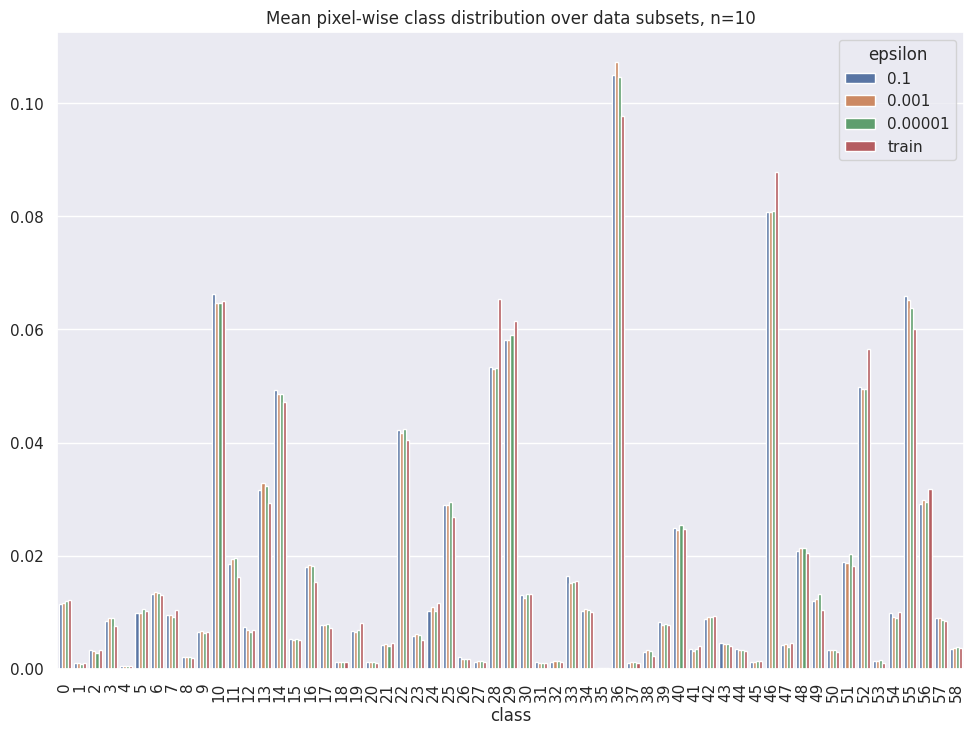

In [137]:
plt = sns.barplot(data=pixel_df, x='class', y='proportion', hue='epsilon')
plt.set_xticklabels(plt.get_xticklabels(),rotation=90)
plt.set_title('Mean pixel-wise class distribution over data subsets, n=10')
plt.set_ylabel('')

#### Figure 5.4.4.6

In [8]:
csv_path = '../plot_csv/section_5/figure_5_4_4_6.csv'
figure_df = pd.read_csv(csv_path)

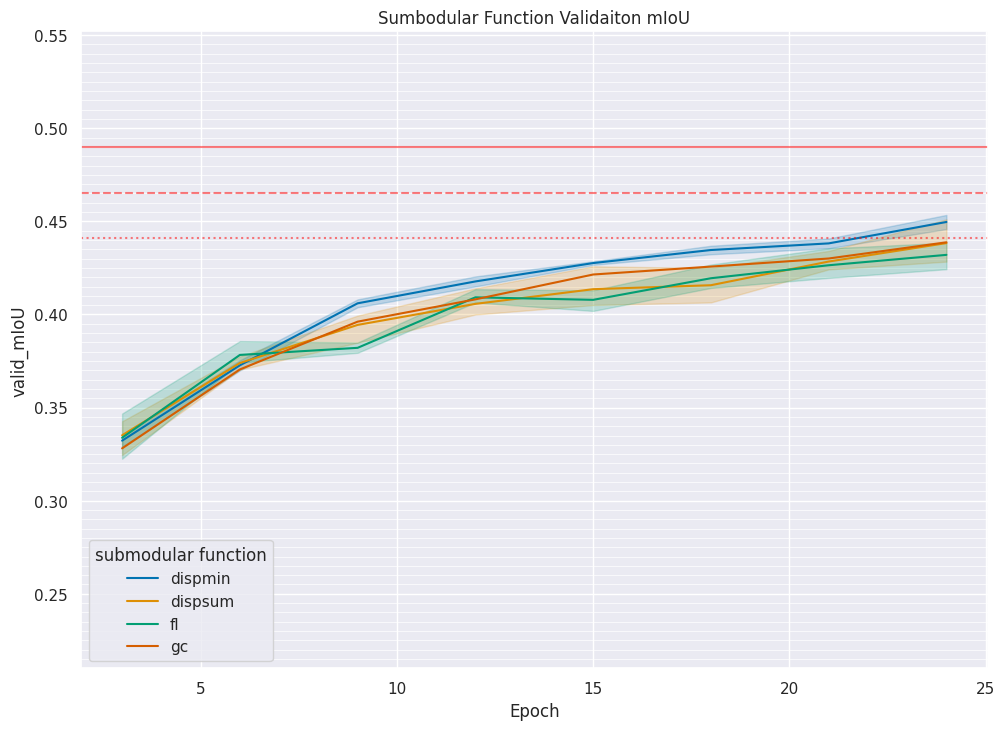

In [11]:
make_performance_line_plot(figure_df, 'step_num', 'valid_mIoU', 'submodular function',"Sumbodular Function Validaiton mIoU")